Forest fires are a serious problem for the preservation of the Tropical Forests. Understanding the frequency of forest fires in a time series can help to take action to prevent them. Brazil has the largest rainforest on the planet that is the Amazon rainforest.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

E:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
df = pd.read_csv('amazon.csv',engine='python')
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [6]:
# Converting Date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [8]:
# No missing value present in the dataset.

In [10]:
# Since date column values are already present in year and month feature, we can drop the date column
df.drop('date',axis=1,inplace=True)
df.head()

,year,state,month,number
0,1998,Acre,Janeiro,0.0
1,1999,Acre,Janeiro,0.0
2,2000,Acre,Janeiro,0.0
3,2001,Acre,Janeiro,0.0
4,2002,Acre,Janeiro,0.0


In [12]:
# Checking the unique year. i.e to get from and till which year the data is collected.
df['year'].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [13]:
# From 1998 till 2017, the data is collected.

In [14]:
# Checking in which all states this forestfire is recoreded.
df['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [20]:
df['number'].value_counts()

0.000      617
1.000      237
2.000      174
3.000      143
4.000      115
          ... 
1.461        1
6.316        1
5.882        1
572.000      1
6.326        1
Name: number, Length: 1479, dtype: int64

In [27]:
# From the above, number of forestfire occurred contains fraction values, hence converting it to a whole number as 1.461 forest fire recoreded doesnot give any proper information.
# So rounding it off to a closest integer value.
df['number'] = df['number'].apply(lambda x: round(x))

([<matplotlib.axis.XTick at 0x1b5d5b5d288>,
 <a list of 20 Text xticklabel objects>)

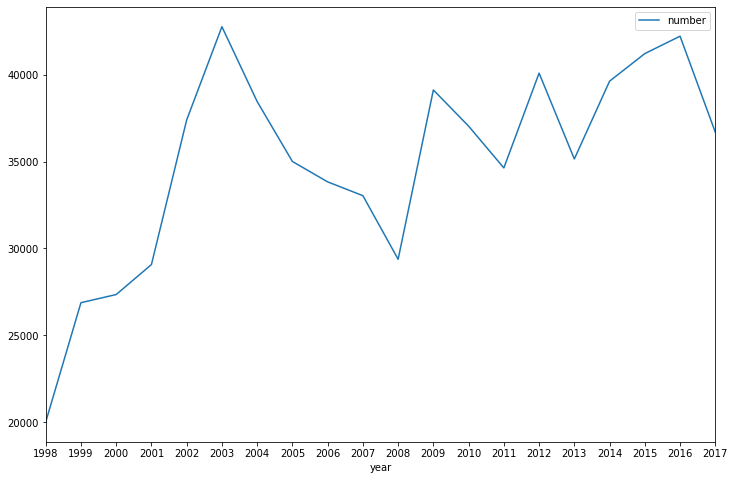

In [43]:
# Checking no. of incidents recorded on each year.
df.groupby(by='year').sum().plot(kind='line',figsize=(12,8))
plt.xticks(df['year'].unique())

From the above plot it is clear that, in the year 2003, more Number of Forest Fires reported. And then in the year 2016, it is again hit the maximum number.
It is also seen that, from 2003 till 2008, there is a sudden dip in the fire accidents reported. After 2001, we can see the lowest number of forestfire occurred is in 2008

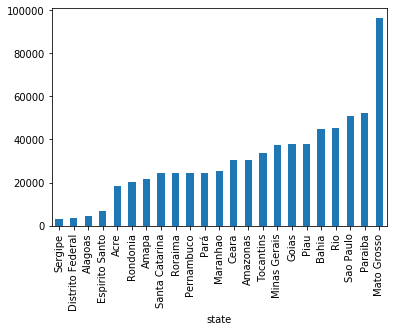

In [48]:
# Which state is facing this problem more?
df.groupby(by='state').sum()['number'].sort_values(ascending=True).plot(kind='bar')

In State Mato Grosso, more number of forestfire is reported. And states Sergipe,Distrito Federal,Alagoas,Espirito Santo are having least fire rates compared to other states.

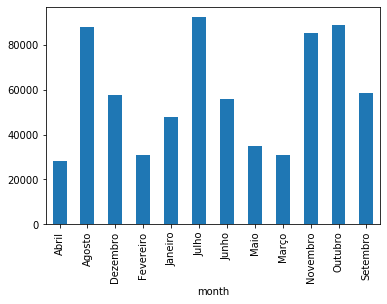

In [53]:
# Checking the number of fire rates in each month
df.groupby(by='month').sum()['number'].plot(kind='bar')

In the month of Agosoto(August),Julho(July),Novembro(November) and Outubro(October), we can see more number of forestfires recorded. And in Abril(April),Maio(May),Marco(March) months, the fire incident recorded is less.

In [56]:
# Lets see the maximum number of forestfire recorded in a month. 
df[df['number'] == df['number'].max()]

,year,state,month,number
888,2008,Amazonas,Setembro,998


 Maximum number of forestfire is recorded in the State Amazonas in 2008-September. 

In [86]:
# sns.distplot(
df[df['number']!=0]['number'].describe()

count    5837.000000
mean      119.734795
std       197.202977
min         1.000000
25%         6.000000
50%        33.000000
75%       131.000000
max       998.000000
Name: number, dtype: float64

### Yearly and State wise ForestFire Calculation and Visualization

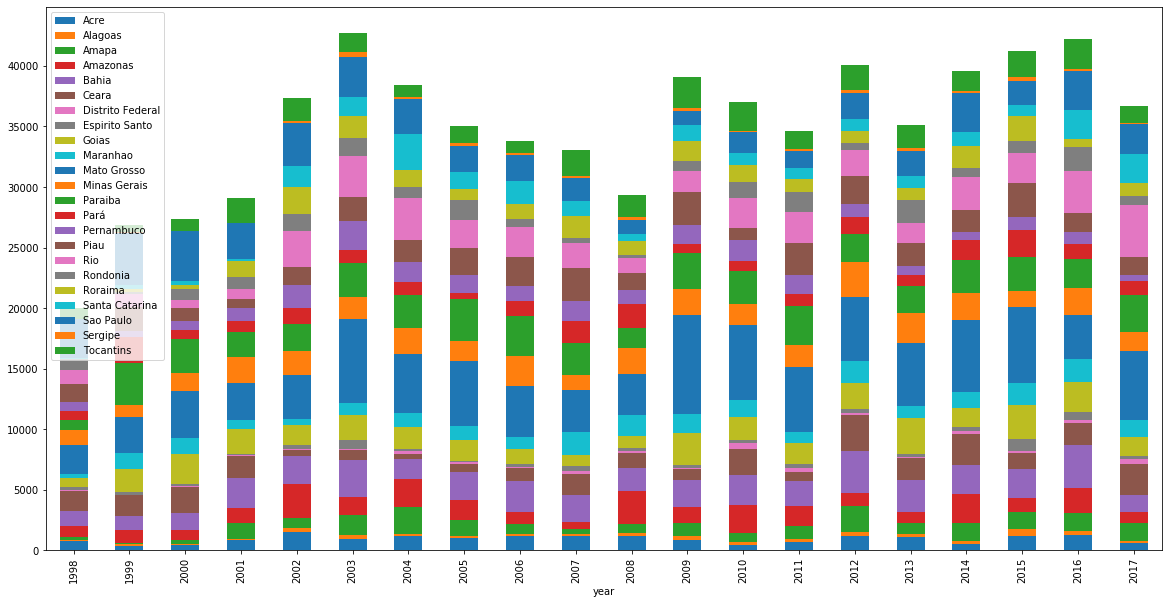

In [111]:
pd.crosstab(df['year'],df['state'],values=df['number'],aggfunc='sum').plot.bar(stacked=True,figsize=(20, 10))
plt.legend()

### Monthly and State wise Forestfire incident Calculation and Visualization

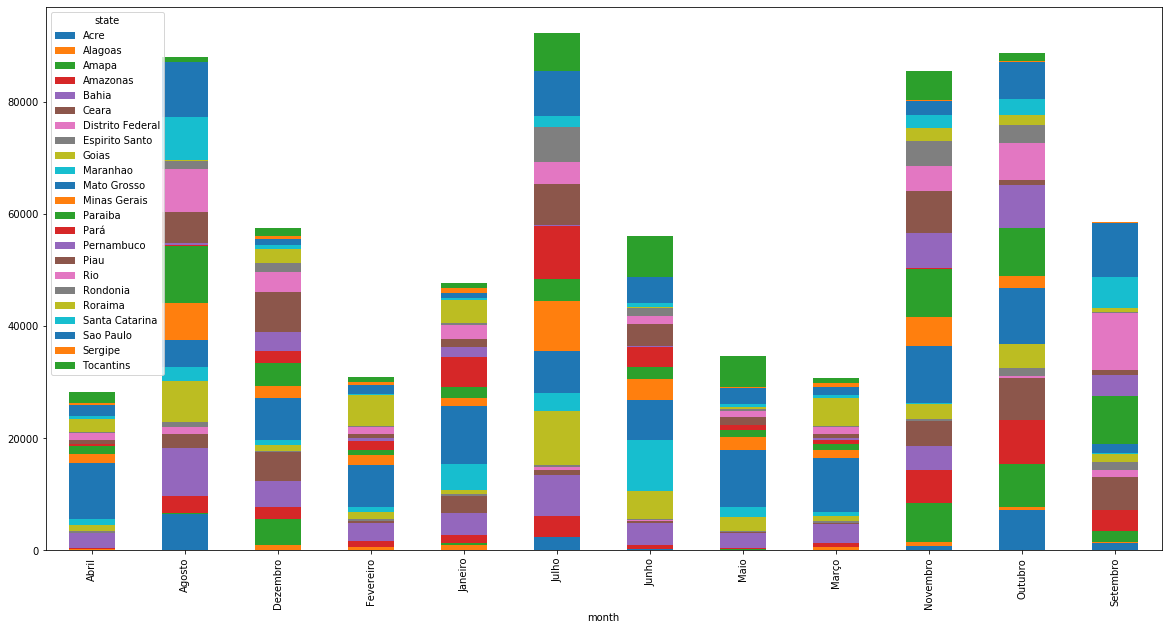

In [114]:
pd.crosstab(df['month'],df['state'],values=df['number'],aggfunc='sum').plot.bar(stacked=True,figsize=(20, 10))

In [116]:
pd.crosstab(df['month'],df['state'],values=df['number'],aggfunc='sum').T

month,Abril,Agosto,Dezembro,Fevereiro,Janeiro,Julho,Junho,Maio,Março,Novembro,Outubro,Setembro
state,,,,,,,,,,,,
Acre,41,6392,47,19,40,2296,257,81,23,708,7247,1312
Alagoas,245,40,964,503,933,11,20,56,554,718,434,166
Amapa,13,274,4504,20,279,32,25,13,16,7052,7686,1917
Amazonas,192,2900,2224,1047,1531,3809,618,219,728,5843,7827,3709
Bahia,2510,8725,4559,3285,3812,7362,4015,2644,3403,4264,75,91
Ceara,76,2405,5250,402,3120,739,245,170,182,4430,7498,5909
Distrito Federal,25,1196,5,13,8,605,184,96,6,13,273,1137
Espirito Santo,266,884,239,327,288,347,263,179,300,464,1413,1576
Goias,1189,7414,1007,1136,737,9575,4935,2398,921,2676,4293,1411


<b>Observartion:-</b>

From the above graph and table, it is clear that the forest fire rate in the State Mato Grosso is always high in all the months.

For the state Acre, there is more forest fire incidents recorded in the months between Julho to Outubro

For Alagoas, the incidents reported are very less compared to other states.

There is only 1 forest fire incident recorded for Sergipe in the month of Julho, where as for all the other states the rate of incidents occurred are more in the months between Julho to Dezembro.

For the state Roraima, it is weird that there is high chance of forests getting fired in the month Fevereiro and Janeiro.

<b>Conclusion:-</b>
 
1. In the year 2003 and 2016, more Number of Forest Fires reported. After 2001, we can see the lowest number of forestfire occurred is in 2008.

2. In State Mato Grosso, more number of forestfire is reported. And states Sergipe,Distrito Federal,Alagoas,Espirito Santo are having least fire rates compared to other states.

3. In the month of Agosoto,Julho,Novembro and Outubro we can see more number of forestfires recorded. And in Abril,Maio,Marco months the fire incident recorded are less.

4. Maximum number of forestfire is recorded in the State Amazonas in 2008-September.